In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../course_notebooks/DATA/iris.csv')

In [2]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

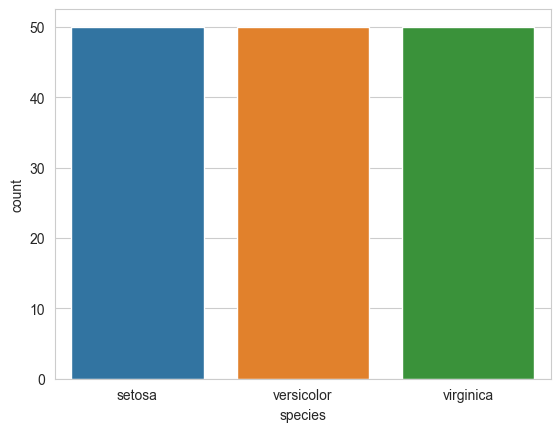

In [5]:
sns.countplot(df,x='species')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

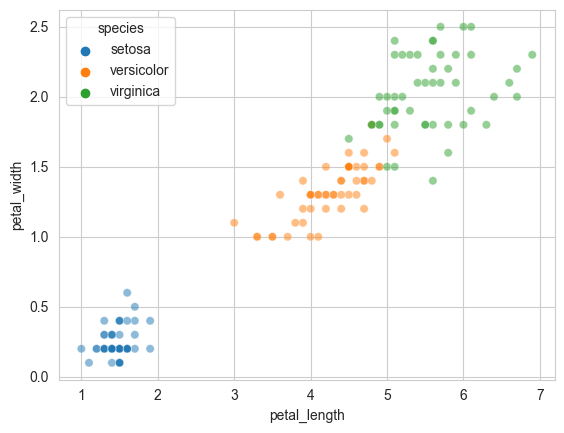

In [8]:
sns.scatterplot(df,x="petal_length",y='petal_width',hue='species',alpha=0.5)

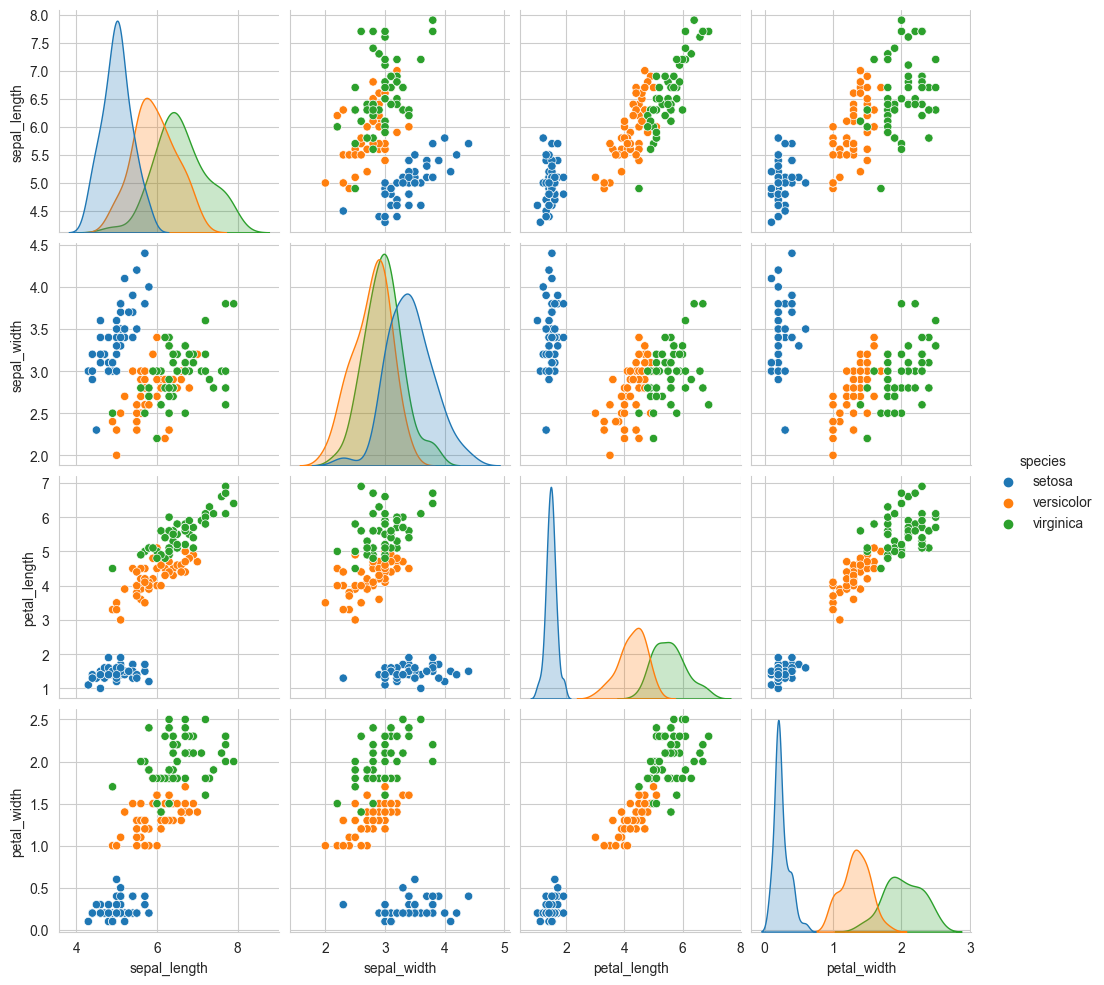

In [9]:
sns.pairplot(df,hue='species')

<AxesSubplot:>

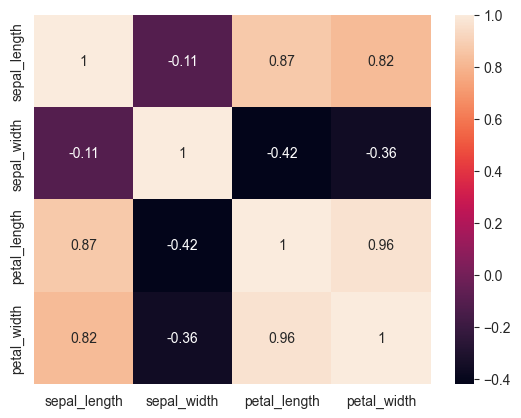

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
x = df.drop('species',axis=1)
y = df['species']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=101)

In [14]:
scaler = StandardScaler()

In [15]:
s_x_train = scaler.fit_transform(x_train)
s_x_test = scaler.transform(x_test)

In [16]:
from sklearn.linear_model import LogisticRegression

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
log_model = LogisticRegression(solver='saga',multi_class='ovr',max_iter=5000)

In [36]:
penalty = ['l1','l2','elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)
param_grid = {'penalty':penalty,'l1_ratio':l1_ratio,'C':C}

In [37]:
grid_model = GridSearchCV(log_model,param_grid=param_grid)

In [38]:
grid_model.fit(s_x_train,y_train)

F:\Dev\python\course\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
F:\Dev\python\course\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
F:\Dev\python\course\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
F:\Dev\python\course\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
F:\Dev\python\course\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [41]:
grid_model.best_params_

{'C': 37.926901907322495,
 'l1_ratio': 0.7368421052631579,
 'penalty': 'elasticnet'}

In [45]:
y_pred = grid_model.predict(s_x_test)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica'],
      dtype=object)

In [46]:
print('accuracy: {}'.format(accuracy_score(y_test,y_pred)))

accuracy: 1.0


In [47]:
confusion_matrix(y_test,y_pred)

array([[6, 0, 0],
       [0, 3, 0],
       [0, 0, 6]], dtype=int64)

F:\Dev\python\course\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


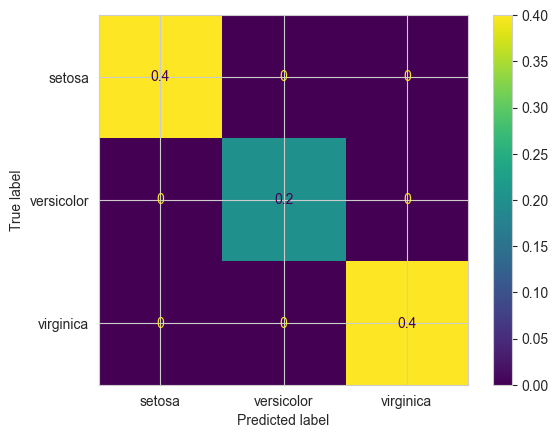

In [50]:
plot_confusion_matrix(grid_model,s_x_test,y_test,normalize='all')

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      1.00      1.00         3
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [53]:
grid_model.predict_proba(s_x_test)[0]


array([9.88875792e-01, 1.11242079e-02, 5.09049618e-19])